# Forecasting Assignment
## Airlines data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import numpy as np

In [2]:
data = pd.read_excel('Airlines+Data.xlsx',
                     names=['Date','Passengers'],
                     sheet_name='Sheet1',parse_dates=True)

In [3]:
data.head()

,Date,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


Plotting number of passnegers vs date\
We can see linear upward trend and multiplicative seasonality in this plot

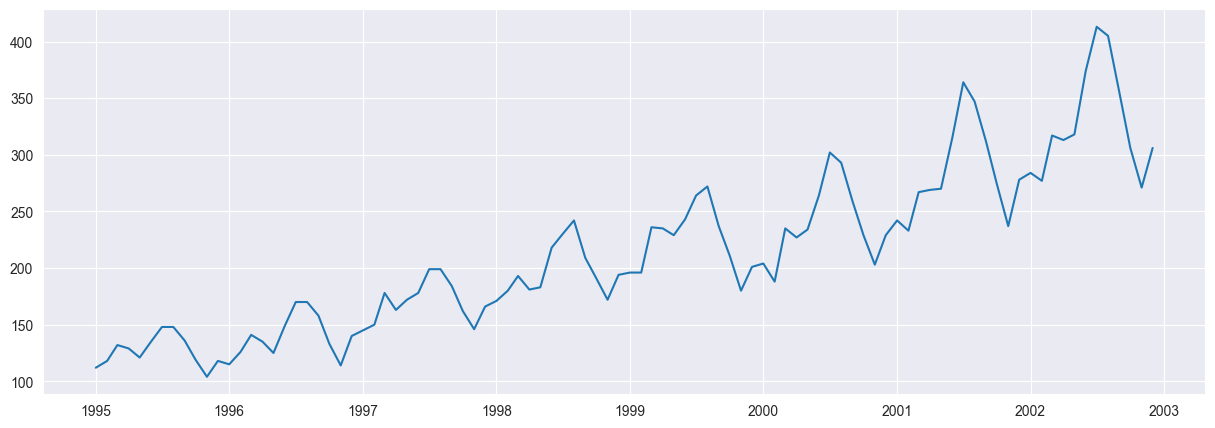

In [4]:
plt.figure(figsize=(15,5))
plt.plot(data['Date'],data['Passengers'])

Making new variables Year and Month extracting from Date

In [5]:
data['Year'] = data['Date'].dt.strftime('%y')
data['Month'] = data['Date'].dt.strftime('%b')

In [6]:
data['t'] = data.index+1
data['t_square'] = data['t']**2
data['log_passengers'] = np.log(data['Passengers'])
data.index = data['Date']
data = pd.get_dummies(data=data, columns=['Month'])

In [7]:
data.head()

,Date,Passengers,Year,t,t_square,log_passengers,Month_Apr,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
Date,,,,,,,,,,,,,,,,,,
1995-01-01,1995-01-01,112,95,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1995-02-01,1995-02-01,118,95,2,4,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
1995-03-01,1995-03-01,132,95,3,9,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
1995-04-01,1995-04-01,129,95,4,16,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
1995-05-01,1995-05-01,121,95,5,25,4.795791,0,0,0,0,0,0,0,0,1,0,0,0


<Axes: xlabel='Year', ylabel='Passengers'>

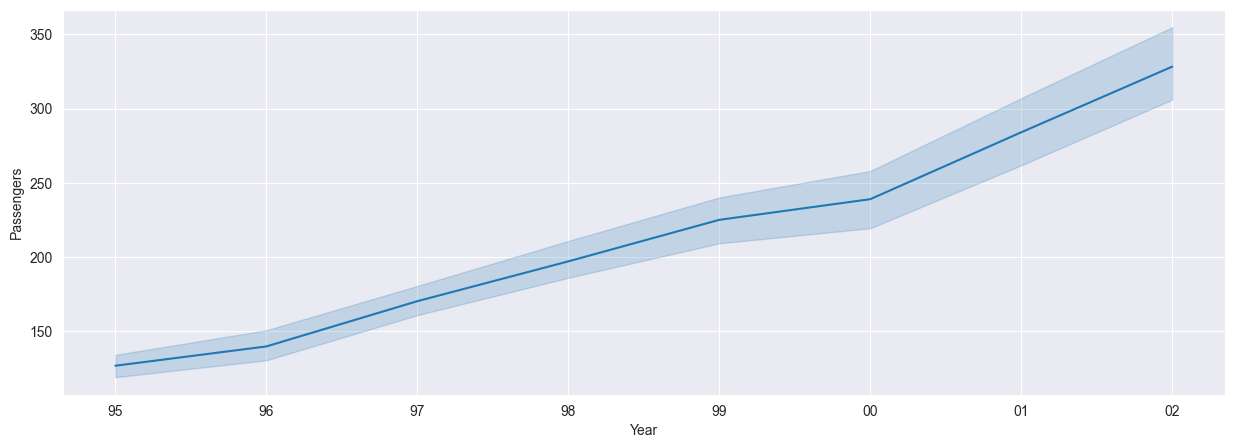

In [8]:
plt.figure(figsize=(15,5))
sns.lineplot(data=data,x='Year',y='Passengers')

### Splitting the data

In [9]:
data.shape

(96, 18)

In [10]:
train = data.iloc[:86]
test = data.iloc[86:]

### Building Models
##### Linear Model

In [11]:
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error

linear_model = smf.ols('Passengers~t', data=train).fit()
pred_linear = linear_model.predict(test['t'])
rmse_linear = np.sqrt(mean_squared_error(test['Passengers'],pred_linear))
print('rmse for linear model is',rmse_linear)

rmse for linear model is 58.64314972778256


##### Exponential Model

In [12]:
exp_model = smf.ols('log_passengers~t', data=train).fit()
pred_exp = exp_model.predict(test['t'])
rmse_exp = np.sqrt(mean_squared_error(test['log_passengers'],pred_exp))
print('rmse for exponential model',rmse_exp)

rmse for exponential model 0.14475099238167138


##### Quadratic Model

In [13]:
quad_model = smf.ols('Passengers~t+t_square', data=train).fit()
pred_quad = quad_model.predict(test[['t','t_square']])
rmse_quad = np.sqrt(mean_squared_error(test['Passengers'],pred_quad))
print('rmse for quadratic model is',rmse_quad)

rmse for quadratic model is 53.914363578529574


##### Additive Seasonality Linear Model

In [14]:
add_sea = smf.ols('Passengers~Month_Jan+Month_Feb+Month_Mar+Month_Apr+Month_Jun+Month_Jul+Month_Aug+Month_Sep+Month_Oct+Month_Nov+Month_Dec', data=train).fit()
pred_add_sea = add_sea.predict(test[['Month_Jan','Month_Feb','Month_Mar','Month_Apr','Month_May','Month_Jun','Month_Jul','Month_Aug','Month_Sep','Month_Oct','Month_Nov','Month_Dec']])
rmse_add_sea = np.sqrt(mean_squared_error(test['Passengers'],pred_add_sea))
print('rmse for additive seasonality model is',rmse_add_sea)

rmse for additive seasonality model is 136.79010436819334


##### Additive Seasonality Quadratic Model

In [15]:
add_sea_quad_model = smf.ols('Passengers~t+t_square+Month_Jan+Month_Feb+Month_Mar+Month_Apr+Month_Jun+Month_Jul+Month_Aug+Month_Sep+Month_Oct+Month_Nov+Month_Dec', data=train).fit()
pred_add_sea_quad = add_sea_quad_model.predict(test[['t','t_square','Month_Jan','Month_Feb','Month_Mar','Month_Apr','Month_May','Month_Jun','Month_Jul','Month_Aug','Month_Sep','Month_Oct','Month_Nov','Month_Dec']])
rmse_add_sea_quad = np.sqrt(mean_squared_error(test['Passengers'],pred_add_sea_quad))
print('rmse for additive seasonality quadratic model is',rmse_add_sea_quad)

rmse for additive seasonality quadratic model is 29.104549899224427


##### Multiplicative Seasonality Model

In [16]:
mult_sea_model = smf.ols('log_passengers~Month_Jan+Month_Feb+Month_Mar+Month_Apr+Month_Jun+Month_Jul+Month_Aug+Month_Sep+Month_Oct+Month_Nov+Month_Dec', data=train).fit()
pred_mult_sea = mult_sea_model.predict(test[['Month_Jan','Month_Feb','Month_Mar','Month_Apr','Month_May','Month_Jun','Month_Jul','Month_Aug','Month_Sep','Month_Oct','Month_Nov','Month_Dec']])
rmse_mult_sea = np.sqrt(mean_squared_error(test['log_passengers'],pred_mult_sea))
print('rmse for multiplicative seasonality model is',rmse_mult_sea)

rmse for multiplicative seasonality model is 0.5456837864857821


### Summarizing results

In [19]:
result_data = pd.DataFrame({'Model':['linear','exponential','quadratic','add_sea','add_sea_quad','mul_sea'],
                            'RMSE_values':[rmse_linear,rmse_exp,rmse_quad,rmse_add_sea,rmse_add_sea_quad,rmse_mult_sea]})
result_data.sort_values('RMSE_values')

,Model,RMSE_values
1,exponential,0.144751
5,mul_sea,0.545684
4,add_sea_quad,29.104550
2,quadratic,53.914364
0,linear,58.643150
3,add_sea,136.790104


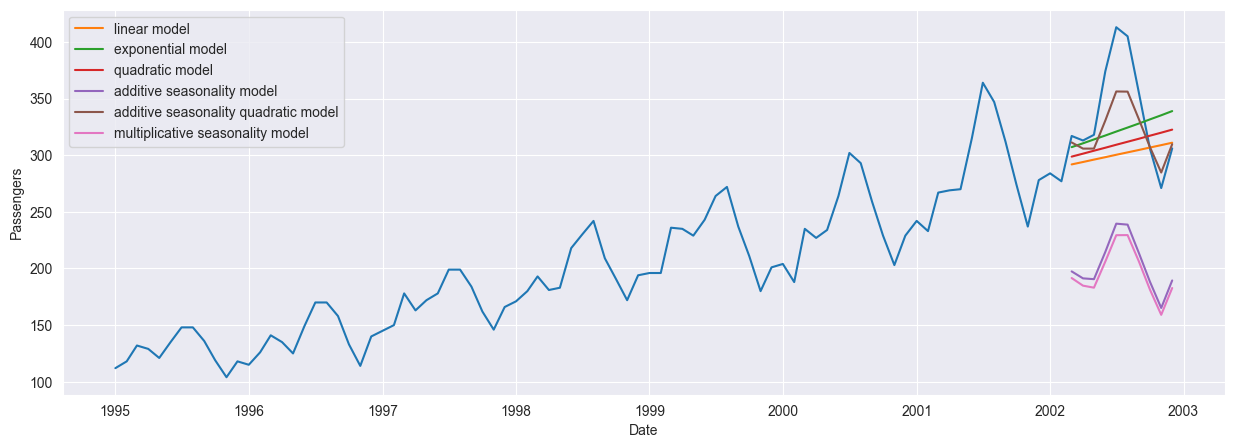

In [20]:
plt.figure(figsize=(15,5))
sns.lineplot(data=data, x='Date', y='Passengers')
sns.lineplot(x=test['Date'], y=pred_linear, label='linear model')
sns.lineplot(x=test['Date'], y=np.exp(pred_exp), label='exponential model')
sns.lineplot(x=test['Date'], y=pred_quad, label='quadratic model')
sns.lineplot(x=test['Date'], y=pred_add_sea, label='additive seasonality model')
sns.lineplot(x=test['Date'], y=pred_add_sea_quad, label='additive seasonality quadratic model')
sns.lineplot(x=test['Date'], y=np.exp(pred_mult_sea), label='multiplicative seasonality model')
plt.legend()

### ARIMA model

Checking data\
p>0.05 --> Non-stationary\
p<0.05 --> Stationary

In [21]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
    dftest = adfuller(dataset,autolag='AIC')
    print("p-value: ",dftest[1])

ad_test(data['Passengers'])

p-value:  0.9968250481137263


##### ETS decomposition (Error, Trend & Seasonality)

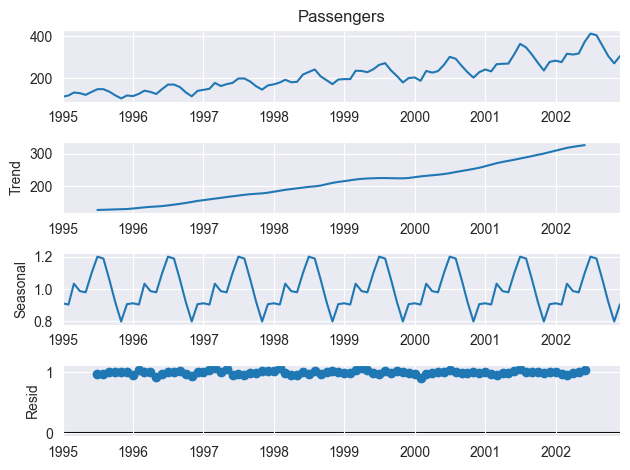

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(data['Passengers'],model='multiplicative')
result.plot();

ARIMA model is specified by 3 order parameters: (p,d,q)\
p: AR(Auto Regression), d: I(Integration), q: MA(Moving Average)\
We will use auto_arima to find optimal values of (p,d,q)

In [23]:
from pmdarima import auto_arima

stepwise_fit = auto_arima(data['Passengers'],
                          start_p=1, start_q=1, max_p=3, max_q=3,
                          m=12, start_P=0, seasonal=True, d=None, D=1, trace=True,
                          error_action='ignore', suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=618.049, Time=0.38 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=622.012, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=615.965, Time=0.12 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=616.628, Time=0.15 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=618.192, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=617.814, Time=0.31 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=617.881, Time=0.24 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=616.531, Time=0.15 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.52 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=618.221, Time=0.07 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=617.862, Time=0.14 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=617.462, Time=0.19 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=616.076, Time=0.13 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=619.394, Time=0.37 sec
 ARIMA(1,1,0)(1,1,0)[12] intercept   

In [24]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   96
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -304.983
Date:                            Tue, 25 Apr 2023   AIC                            615.965
Time:                                    21:23:34   BIC                            623.222
Sample:                                01-01-1995   HQIC                           618.881
                                     - 12-01-2002                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2250      0.099     -2.276      0.023      -0.419      -0.031
ar.S.L12      -0.2274      0.089     -2.548      0.011      -0.402      -0.052
sigma2        90.2700     14.667      6.155      0.000      61.524     119.016
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.23
Prob(Q):                              0.97   Prob(JB):                         0.33
Heteroskedasticity (H):               1.77   Skew:                             0.39
Prob(H) (two-sided):                  0.14   Kurtosis:                         2.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

We are using SARIMAX model\
SARIMAX: Seasonal ARIMA with exogenous variables\
using best order obtained from auto_arima

In [25]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

arima_model = SARIMAX(train['Passengers'],order=(1,1,0),seasonal_order=(1,1,0,12))
arima_model = arima_model.fit()
arima_model.summary()

C:\Users\anike\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\anike\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         Passengers   No. Observations:                   86
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -268.967
Date:                            Tue, 25 Apr 2023   AIC                            543.935
Time:                                    21:23:35   BIC                            550.806
Sample:                                01-01-1995   HQIC                           546.673
                                     - 02-01-2002                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2408      0.105     -2.291      0.022      -0.447      -0.035
ar.S.L12      -0.2576      0.094     -2.738      0.006      -0.442      -0.073
sigma2        91.7432     15.809      5.803      0.000      60.758     122.729
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.29
Prob(Q):                              0.98   Prob(JB):                         0.32
Heteroskedasticity (H):               2.32   Skew:                             0.42
Prob(H) (two-sided):                  0.04   Kurtosis:                         2.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
start = len(train)
end = len(train)+len(test)-1
print(start,end)

86 95


In [29]:
pred_arima = arima_model.predict(start=start, end=end)
pred_arima

2002-03-01    313.432752
2002-04-01    313.077425
2002-05-01    315.569851
2002-06-01    356.718761
2002-07-01    402.882163
2002-08-01    387.943644
2002-09-01    353.201058
2002-10-01    317.261840
2002-11-01    283.095345
2002-12-01    320.231462
Freq: MS, Name: predicted_mean, dtype: float64

In [30]:
rmse_arima = np.sqrt(mean_squared_error(pred_arima,test['Passengers']))
print('rmse for ARIMA model is',rmse_arima)

rmse for ARIMA model is 10.906260291921996


<Axes: xlabel='Date', ylabel='Passengers'>

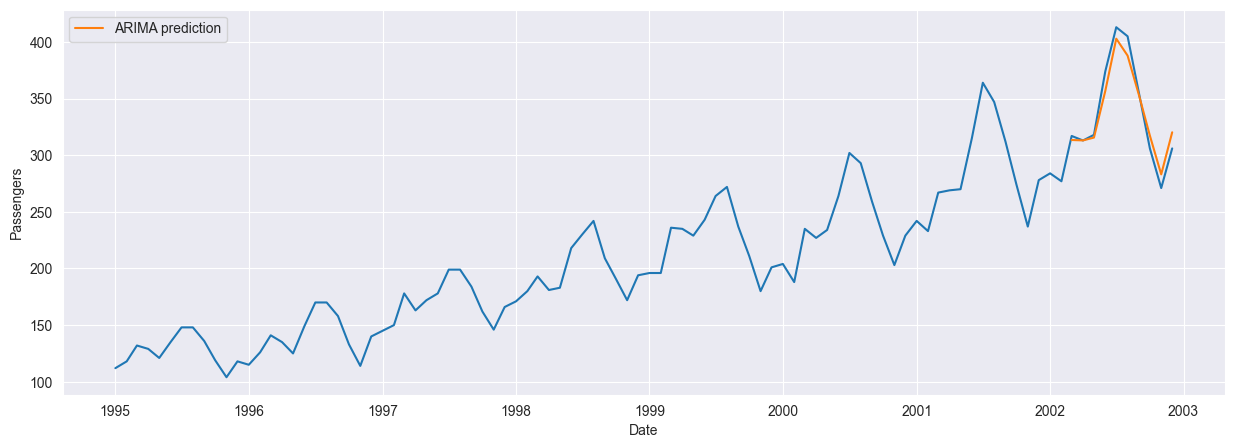

In [31]:
plt.figure(figsize=(15,5))
sns.lineplot(data=data, x='Date', y='Passengers')
sns.lineplot(pred_arima, label='ARIMA prediction')